# 4 or more ML Classifiers
The following ML techniques will be implemented:
1. Decision trees
2. Random forest
3. Gradient Boosting
4. Bagging

## Data Setup

In [51]:
# Libraries
import pandas
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

# Load preprocessed data
data = pandas.read_csv('preprocessed_data.csv')
print("Dataset read.")

# Input features and target
x = data[[ 	'latitude', 'longitude', # Location
		  	'year', 'month', 'day', 'hour', # Time; Removing 'minute' increased scores slightly
			'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magNst' # Quality
		]]
y = data[ 'mag' ]
print("Features saved.")

# Split inot training and testing datasets
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.2, random_state = 42 )
print("Data split.")

Dataset read.
Features saved.
Data split.


## Model 1: Linear Regression

In [52]:
linear = LinearRegression()
linear.fit( xtrain, ytrain )

with open('linear.model', 'wb') as f:
	pickle.dump( linear, f )

loaded_model = pickle.load( open('linear.model', 'rb') )
score_linear = loaded_model.score( xtest, ytest )
print("Linear model score:", score_linear )

Linear model score: 0.06552262168577538


## Model 2: Decision Tree Regression

In [53]:
decision_tree = DecisionTreeRegressor( random_state = 42 )
decision_tree.fit( xtrain, ytrain )

with open('decision_tree.model', 'wb') as f:
	pickle.dump( decision_tree, f )

loaded_model = pickle.load( open('decision_tree.model', 'rb') )
score_dt = loaded_model.score( xtest, ytest )
print("Decision tree model score:", score_dt )

Decision tree model score: -0.05212163903138589


## Model 3: Random Forest Regression

In [54]:
random_forest = RandomForestRegressor( n_estimators = 100, n_jobs = -1, random_state = 42 )
random_forest.fit( xtrain, ytrain )

with open('random_forest.model', 'wb') as f:
	pickle.dump( random_forest, f )

loaded_model = pickle.load( open('random_forest.model', 'rb') )
score_rf = loaded_model.score( xtest, ytest )
print("Random forest model score:", score_rf )

Random forest model score: 0.459875262346524


## Model 4: Gradient Boosting Regression

In [55]:
gradient_regression = HistGradientBoostingRegressor( max_iter = 200, random_state=42 )
gradient_regression.fit( xtrain, ytrain)

with open('gradient_regression.model', 'wb') as f:
	pickle.dump( gradient_regression, f )

loaded_model = pickle.load( open('gradient_regression.model', 'rb') )
score_gb = loaded_model.score( xtest, ytest )
print("Gradient regression model score:", score_gb )

Gradient regression model score: 0.43206115878759843


## Model 5: Bagging Regression

In [56]:
bagging_regression = BaggingRegressor( n_estimators=100, n_jobs = -1, random_state=42 )
bagging_regression.fit( xtrain, ytrain)

with open('bagging_regression.model', 'wb') as f:
    pickle.dump ( bagging_regression, f)

loaded_model = pickle.load( open('bagging_regression.model', 'rb') )
score_bag = loaded_model.score( xtest, ytest )
print("Bagging Regression model score:", score_bag )

Bagging Regression model score: 0.45917831395013287


## Output

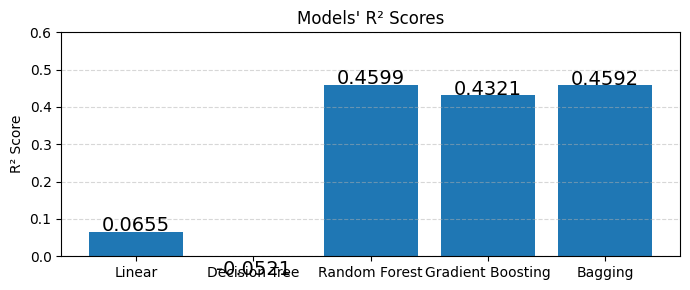

In [57]:
import matplotlib.pyplot as plot

scores = {
	'Linear': score_linear,
	'Decision Tree': score_dt,
	'Random Forest': score_rf,
	'Gradient Boosting': score_gb,
	'Bagging': score_bag
}

plot.figure( figsize = (7, 3) )
plot.bar( scores.keys(), scores.values() )

plot.title("Models' R² Scores")
plot.ylabel("R² Score")
plot.ylim( 0, 0.6 )
plot.grid( axis = 'y', linestyle = '--', alpha = 0.5 )

for i, ( model, score ) in enumerate( scores.items() ):
	plot.text( i, score + 0.001, f"{score:.4f}", ha = 'center', fontsize = 14 )

plot.tight_layout()
plot.show()